In [16]:
import os
import pandas as pd
import sqlite3
import requests
import webbrowser

# URLs for the datasets
url1 = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/ten00124?format=TSV&compressed=false"
url2 = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/sdg_13_10?format=TSV&compressed=false"

# Data directory
output_dir = "output"
tsv_paths = {
    "data1": os.path.join(output_dir, "final_energy_consumption_by_sector.tsv"),
    "data2": os.path.join(output_dir, "net_greenhouse_gas_emissions.tsv"),

}
excel_paths = {
    "data1": os.path.join(output_dir, "final_energy_consumption_by_sector.xlsx"),
    "data2": os.path.join(output_dir, "net_greenhouse_gas_emissions.xlsx"),

}
database_paths = {
    "database1": os.path.join(output_dir, "final_energy_consumption_by_sector.db"),
    "database2": os.path.join(output_dir, "net_greenhouse_gas_emissions.db"),

}

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to download and save files
def download_file(url, file_path):
    if not os.path.exists(file_path):
        response = requests.get(url)
        response.raise_for_status()
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {file_path}")
    else:
        print(f"File {file_path} already exists. Skipping download.")

# Download the datasets
print("Downloading datasets...")
download_file(url1, tsv_paths["data1"])
download_file(url2, tsv_paths["data2"])

print("Download complete.")

# Read the datasets into DataFrames
print("Reading datasets into DataFrames...")
energy_consumption = pd.read_csv(tsv_paths["data1"], delimiter='\t', encoding='ISO-8859-1')
greenhouse_emissions = pd.read_csv(tsv_paths["data2"], delimiter='\t', encoding='ISO-8859-1')


# Fill missing values with 0
print("Filling missing values...")
energy_consumption.fillna(0, inplace=True)
greenhouse_emissions.fillna(0, inplace=True)


# Clean column names (strip and lowercase)
print("Cleaning column names...")
energy_consumption.columns = [col.strip().lower() for col in energy_consumption.columns]
greenhouse_emissions.columns = [col.strip().lower() for col in greenhouse_emissions.columns]

# Save cleaned DataFrames to Excel files
def save_to_excel(df, excel_path):
    if os.path.exists(excel_path):
        os.remove(excel_path)
    df.to_excel(excel_path, index=False)
    print(f"Data saved to {excel_path}")

# Save cleaned DataFrames as Excel files
save_to_excel(energy_consumption, excel_paths["data1"])
save_to_excel(greenhouse_emissions, excel_paths["data2"])


print("Data cleaning and saving completed.")

# Save DataFrames to SQLite databases
def save_to_sqlite(df, db_path, table_name):
    if os.path.exists(db_path):
        os.remove(db_path)
    conn = sqlite3.connect(db_path)
    df.to_sql(table_name, conn, if_exists="replace", index=False)
    conn.close()
    print(f"Data saved to {db_path} in table {table_name}")

save_to_sqlite(energy_consumption, database_paths["database1"], "final_energy_consumption_by_sector")
save_to_sqlite(greenhouse_emissions, database_paths["database2"], "net_greenhouse_gas_emissions")


print("Data pipeline execution completed.")

# Open files with specified names
def open_files(file_paths):
    for file_path, display_name in file_paths.items():
        if os.path.exists(file_path):
            print(f"Opening {display_name} at {file_path}")
            webbrowser.open(f'file://{os.path.abspath(file_path)}')
        else:
            print(f"{file_path} does not exist.")

# Open Excel files and SQLite databases with different names
excel_files = {
    excel_paths["data1"]: "Final Energy Consumption by Sector Data",
    excel_paths["data2"]: "Net Greenhouse Gas Emissions Data",

}
open_files(excel_files)

sqlite_dbs = {
    database_paths["database1"]: "Final Energy Consumption by Sector Database",
    database_paths["database2"]: "Net Greenhouse Gas Emissions Database",

}
open_files(sqlite_dbs)


Downloaded output/final_energy_consumption_by_sector.tsv
Downloaded output/net_greenhouse_gas_emissions.tsv
Download complete.
Reading datasets into DataFrames...
Filling missing values...
Cleaning column names...
Data saved to output/final_energy_consumption_by_sector.xlsx
Data saved to output/net_greenhouse_gas_emissions.xlsx
Data cleaning and saving completed.
Data saved to output/final_energy_consumption_by_sector.db in table final_energy_consumption_by_sector
Data saved to output/net_greenhouse_gas_emissions.db in table net_greenhouse_gas_emissions
Data pipeline execution completed.
Opening Final Energy Consumption by Sector Data at output/final_energy_consumption_by_sector.xlsx
Opening Net Greenhouse Gas Emissions Data at output/net_greenhouse_gas_emissions.xlsx
Opening Final Energy Consumption by Sector Database at output/final_energy_consumption_by_sector.db
Opening Net Greenhouse Gas Emissions Database at output/net_greenhouse_gas_emissions.db


### SECTOR WISE ENERGY CONSUMPTION

In [17]:
energy_consumption.columns

Index(['freq,nrg_bal,siec,unit,geo\time_period', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [18]:
energy_consumption.head()

,"freq,nrg_bal,siec,unit,geo\time_period",2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"A,FC_E,TOTAL,KTOE,AL",1953.468,1790.623,1961.871,2058.574,1962.498,1899.558,2078.928,2134.212,2053.036,1840.668,2012.504,1958.847
1,"A,FC_E,TOTAL,KTOE,AT",25092.859,25201.329,25801.476,24760.998,25475.009,26099.472,26502.780,26042.437,26221.621,24872.933,26487.778,24823.616
2,"A,FC_E,TOTAL,KTOE,BA",:,:,:,3103.624,3316.907,3543.934,3497.933,4211.931,4207.688,4024.489,4305.320,4290.012
3,"A,FC_E,TOTAL,KTOE,BE",32624.012,33058.280,34107.252,31594.248,33155.900,33437.524,32979.543,33204.836,32590.234,30938.838,33173.523,30383.390
4,"A,FC_E,TOTAL,KTOE,BG",9125.105,9103.369,8680.757,8881.501,9388.553,9517.949,9745.903,9757.670,9719.600,9499.659,10164.447,9854.067


In [19]:
# Filter the DataFrame where the specified columns end with "DE"
energy_consumption_EU= energy_consumption[energy_consumption['freq,nrg_bal,siec,unit,geo\\time_period'].str.endswith('EU27_2020')]
energy_consumption_EU.columns

Index(['freq,nrg_bal,siec,unit,geo\time_period', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [20]:
energy_consumption_EU.rename(columns={'freq,nrg_bal,siec,unit,geo\\time_period': 'year'}, inplace=True)
energy_consumption_EU

<ipython-input-20-8f034e3a03fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_consumption_EU.rename(columns={'freq,nrg_bal,siec,unit,geo\\time_period': 'year'}, inplace=True)


,year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
12,"A,FC_E,TOTAL,KTOE,EU27_2020",934577.602,933948.049,932228.051,890529.118,909898.236,928182.513,941177.648,942928.329,937979.399,885119.323,939151.686,902151.506
53,"A,FC_IND_E,TOTAL,KTOE,EU27_2020",244386.095,239835.981,236913.967,233441.635,233475.933,237760.295,239973.737,241772.617,238971.384,230303.266,241438.524,226254.751
94,"A,FC_OTH_CP_E,TOTAL,KTOE,EU27_2020",128319.937,131113.382,132610.323,123375.593,128594.113,130187.179,133883.152,131976.670,128875.741,121385.640,130006.218,121327.959
135,"A,FC_OTH_HH_E,TOTAL,KTOE,EU27_2020",252688.735,263811.403,266975.660,235169.631,245947.332,251870.791,252719.439,250749.370,248657.991,248742.692,262128.689,242494.564
176,"A,FC_TRA_E,TOTAL,KTOE,EU27_2020",278859.112,269085.076,265347.632,268718.554,272408.498,278670.070,284540.635,285948.525,288654.895,251380.184,271813.986,279899.781


In [21]:
energy_consumption_EU = energy_consumption_EU.T  # Transpose the DataFrame
energy_consumption_EU.columns = energy_consumption_EU.iloc[0]  # Set the first row as column headers#
energy_consumption_EU = energy_consumption_EU[1:]  # Exclude the first row as it's now the header
#energy_consumption_EU = energy_consumption_EU[['A,GHG,TOTX4_MEMONIA,T_HAB,DE', 'A,GHG,TOTXMEMONIA,T_HAB,DE']]
energy_consumption_EU

year,"A,FC_E,TOTAL,KTOE,EU27_2020","A,FC_IND_E,TOTAL,KTOE,EU27_2020","A,FC_OTH_CP_E,TOTAL,KTOE,EU27_2020","A,FC_OTH_HH_E,TOTAL,KTOE,EU27_2020","A,FC_TRA_E,TOTAL,KTOE,EU27_2020"
2011,934577.602,244386.095,128319.937,252688.735,278859.112
2012,933948.049,239835.981,131113.382,263811.403,269085.076
2013,932228.051,236913.967,132610.323,266975.660,265347.632
2014,890529.118,233441.635,123375.593,235169.631,268718.554
2015,909898.236,233475.933,128594.113,245947.332,272408.498
2016,928182.513,237760.295,130187.179,251870.791,278670.07
2017,941177.648,239973.737,133883.152,252719.439,284540.635
2018,942928.329,241772.617,131976.67,250749.37,285948.525
2019,937979.399,238971.384,128875.741,248657.991,288654.895
2020,885119.323,230303.266,121385.640,248742.692,251380.184


In [22]:
energy_consumption_EU.columns

Index(['A,FC_E,TOTAL,KTOE,EU27_2020', 'A,FC_IND_E,TOTAL,KTOE,EU27_2020',
       'A,FC_OTH_CP_E,TOTAL,KTOE,EU27_2020',
       'A,FC_OTH_HH_E,TOTAL,KTOE,EU27_2020',
       'A,FC_TRA_E,TOTAL,KTOE,EU27_2020'],
      dtype='object', name='year')

In [23]:
energy_consumption_EU.rename(columns={
    'freq,nrg_bal,siec,unit,geo\time_period	': 'Year',
    'A,FC_E,TOTAL,KTOE,EU27_2020': 'Energy_Total',
    'A,FC_IND_E,TOTAL,KTOE,EU27_2020': 'Energy_Industrial',
    'A,FC_OTH_CP_E,TOTAL,KTOE,EU27_2020': 'Energy_Commercial',
    'A,FC_OTH_HH_E,TOTAL,KTOE,EU27_2020': 'Energy_House_Hold',
    'A,FC_TRA_E,TOTAL,KTOE,EU27_2020': 'Energy_Transport'
}, inplace=True)
energy_consumption_EU

year,Energy_Total,Energy_Industrial,Energy_Commercial,Energy_House_Hold,Energy_Transport
2011,934577.602,244386.095,128319.937,252688.735,278859.112
2012,933948.049,239835.981,131113.382,263811.403,269085.076
2013,932228.051,236913.967,132610.323,266975.660,265347.632
2014,890529.118,233441.635,123375.593,235169.631,268718.554
2015,909898.236,233475.933,128594.113,245947.332,272408.498
2016,928182.513,237760.295,130187.179,251870.791,278670.07
2017,941177.648,239973.737,133883.152,252719.439,284540.635
2018,942928.329,241772.617,131976.67,250749.37,285948.525
2019,937979.399,238971.384,128875.741,248657.991,288654.895
2020,885119.323,230303.266,121385.640,248742.692,251380.184


In [24]:
energy_consumption_EU.rename(columns={'freq,nrg_bal,siec,unit,geo\\time_period': 'year'}, inplace=True)
energy_consumption_EU

year,Energy_Total,Energy_Industrial,Energy_Commercial,Energy_House_Hold,Energy_Transport
2011,934577.602,244386.095,128319.937,252688.735,278859.112
2012,933948.049,239835.981,131113.382,263811.403,269085.076
2013,932228.051,236913.967,132610.323,266975.660,265347.632
2014,890529.118,233441.635,123375.593,235169.631,268718.554
2015,909898.236,233475.933,128594.113,245947.332,272408.498
2016,928182.513,237760.295,130187.179,251870.791,278670.07
2017,941177.648,239973.737,133883.152,252719.439,284540.635
2018,942928.329,241772.617,131976.67,250749.37,285948.525
2019,937979.399,238971.384,128875.741,248657.991,288654.895
2020,885119.323,230303.266,121385.640,248742.692,251380.184


In [25]:
# Function to clean the Energy columns
def clean_energy(energy):
    if isinstance(energy, str):
        return energy.replace(" b", "")
    else:
        return energy

# Apply the function to each column and convert to float
for col in energy_consumption_EU.columns:
    energy_consumption_EU[col] = energy_consumption_EU[col].apply(clean_energy).astype(float)


energy_consumption_EU

year,Energy_Total,Energy_Industrial,Energy_Commercial,Energy_House_Hold,Energy_Transport
2011,934577.602,244386.095,128319.937,252688.735,278859.112
2012,933948.049,239835.981,131113.382,263811.403,269085.076
2013,932228.051,236913.967,132610.323,266975.660,265347.632
2014,890529.118,233441.635,123375.593,235169.631,268718.554
2015,909898.236,233475.933,128594.113,245947.332,272408.498
2016,928182.513,237760.295,130187.179,251870.791,278670.070
2017,941177.648,239973.737,133883.152,252719.439,284540.635
2018,942928.329,241772.617,131976.670,250749.370,285948.525
2019,937979.399,238971.384,128875.741,248657.991,288654.895
2020,885119.323,230303.266,121385.640,248742.692,251380.184


### GREENHOUSE GAS EMISSIONS

In [26]:
greenhouse_emissions.columns

Index(['freq,airpol,src_crf,unit,geo\time_period', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

In [27]:
greenhouse_emissions.head()

,"freq,airpol,src_crf,unit,geo\time_period",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"A,GHG,TOTX4_MEMONIA,I90,AT",100.0,104.7,96.6,97.2,97.5,101.7,105.8,105.4,104.6,...,102.9,98.4,101.4,102.8,105.6,101.9,103.8,93.9,98.3,93.6
1,"A,GHG,TOTX4_MEMONIA,I90,BE",100.0,101.4,101.1,100.3,103.4,105.0,107.8,102.3,106.1,...,83.5,79.8,82.9,81.8,81.8,82.5,81.8,74.5,77.0,73.1
2,"A,GHG,TOTX4_MEMONIA,I90,BG",100.0,81.9,76.5,76.1,71.8,73.4,73.5,70.1,66.0,...,55.0,58.0,61.3,58.7,60.6,56.3,54.9,48.6,54.7,59.2
3,"A,GHG,TOTX4_MEMONIA,I90,CH",100.0,103.1,102.9,98.6,97.0,98.9,100.2,98.4,101.3,...,99.9,93.2,92.6,93.5,92.1,90.1,89.8,78.9,81.6,78.9
4,"A,GHG,TOTX4_MEMONIA,I90,CY",100.0,110.2,116.7,119.3,123.7,123.5,128.9,130.2,135.9,...,138.3,144.2,144.5,153.4,158.0,157.0,157.6,140.5,147.3,151.9


In [28]:
# Filter the DataFrame where the specified columns end with "EU"
greenhouse_emissions_EU = greenhouse_emissions[greenhouse_emissions['freq,airpol,src_crf,unit,geo\\time_period'].str.endswith('EU27_2020')]
greenhouse_emissions_EU

,"freq,airpol,src_crf,unit,geo\time_period",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
11,"A,GHG,TOTX4_MEMONIA,I90,EU27_2020",100.0,97.8,94.8,93.3,92.9,94.0,95.9,94.5,93.8,...,81.4,78.5,79.6,79.6,80.3,78.8,75.5,68.0,71.7,70.8
42,"A,GHG,TOTX4_MEMONIA,T_HAB,EU27_2020",11.8,11.5 b,11.1,10.9,10.8,10.9,11.1,10.9,10.8 b,...,9.1,8.7 b,8.8 b,8.8,8.9 b,8.7 e,8.3 be,7.5 be,7.9 bep,7.8 bep
73,"A,GHG,TOTXMEMONIA,I90,EU27_2020",100.0,95.6,93.1,91.1,90.9,91.6,93.0,91.7,90.7,...,77.7,75.1,76.4,76.6,78.7,77.0,73.9,66.1,69.9,69.0
104,"A,GHG,TOTXMEMONIA,T_HAB,EU27_2020",11.2,10.7 b,10.4,10.1,10.1,10.2,10.3,10.1,10.0 b,...,8.3,8.0 b,8.1 b,8.1,8.3 b,8.1 e,7.8 be,7.0 be,7.4 bep,7.3 bep


In [29]:
greenhouse_emissions_EU.rename(columns={'freq,airpol,src_crf,unit,geo\\time_period': 'year'}, inplace=True)
greenhouse_emissions_EU

<ipython-input-29-0c19616ef7f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greenhouse_emissions_EU.rename(columns={'freq,airpol,src_crf,unit,geo\\time_period': 'year'}, inplace=True)


,year,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
11,"A,GHG,TOTX4_MEMONIA,I90,EU27_2020",100.0,97.8,94.8,93.3,92.9,94.0,95.9,94.5,93.8,...,81.4,78.5,79.6,79.6,80.3,78.8,75.5,68.0,71.7,70.8
42,"A,GHG,TOTX4_MEMONIA,T_HAB,EU27_2020",11.8,11.5 b,11.1,10.9,10.8,10.9,11.1,10.9,10.8 b,...,9.1,8.7 b,8.8 b,8.8,8.9 b,8.7 e,8.3 be,7.5 be,7.9 bep,7.8 bep
73,"A,GHG,TOTXMEMONIA,I90,EU27_2020",100.0,95.6,93.1,91.1,90.9,91.6,93.0,91.7,90.7,...,77.7,75.1,76.4,76.6,78.7,77.0,73.9,66.1,69.9,69.0
104,"A,GHG,TOTXMEMONIA,T_HAB,EU27_2020",11.2,10.7 b,10.4,10.1,10.1,10.2,10.3,10.1,10.0 b,...,8.3,8.0 b,8.1 b,8.1,8.3 b,8.1 e,7.8 be,7.0 be,7.4 bep,7.3 bep


In [30]:
greenhouse_emissions_EU = greenhouse_emissions_EU.T  # Transpose the DataFrame
greenhouse_emissions_EU.columns = greenhouse_emissions_EU.iloc[0]  # Set the first row as column heaEUrs

greenhouse_emissions_EU

year,"A,GHG,TOTX4_MEMONIA,I90,EU27_2020","A,GHG,TOTX4_MEMONIA,T_HAB,EU27_2020","A,GHG,TOTXMEMONIA,I90,EU27_2020","A,GHG,TOTXMEMONIA,T_HAB,EU27_2020"
year,"A,GHG,TOTX4_MEMONIA,I90,EU27_2020","A,GHG,TOTX4_MEMONIA,T_HAB,EU27_2020","A,GHG,TOTXMEMONIA,I90,EU27_2020","A,GHG,TOTXMEMONIA,T_HAB,EU27_2020"
1990,100.0,11.8,100.0,11.2
1991,97.8,11.5 b,95.6,10.7 b
1992,94.8,11.1,93.1,10.4
1993,93.3,10.9,91.1,10.1
1994,92.9,10.8,90.9,10.1
1995,94.0,10.9,91.6,10.2
1996,95.9,11.1,93.0,10.3
1997,94.5,10.9,91.7,10.1
1998,93.8,10.8 b,90.7,10.0 b


In [31]:
greenhouse_emissions_EU = greenhouse_emissions_EU[1:]  # Exclude the first row as it's now the header

In [32]:
greenhouse_emissions_EU.rename(columns={'A,GHG,TOTXMEMONIA,T_HAB,EU27_2020': 'Greenhouse Emissions'}, inplace=True)
greenhouse_emissions_EU

<ipython-input-32-52b5e2b8459d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greenhouse_emissions_EU.rename(columns={'A,GHG,TOTXMEMONIA,T_HAB,EU27_2020': 'Greenhouse Emissions'}, inplace=True)


year,"A,GHG,TOTX4_MEMONIA,I90,EU27_2020","A,GHG,TOTX4_MEMONIA,T_HAB,EU27_2020","A,GHG,TOTXMEMONIA,I90,EU27_2020",Greenhouse Emissions
1990,100.0,11.8,100.0,11.2
1991,97.8,11.5 b,95.6,10.7 b
1992,94.8,11.1,93.1,10.4
1993,93.3,10.9,91.1,10.1
1994,92.9,10.8,90.9,10.1
1995,94.0,10.9,91.6,10.2
1996,95.9,11.1,93.0,10.3
1997,94.5,10.9,91.7,10.1
1998,93.8,10.8 b,90.7,10.0 b
1999,92.4,10.6,89.0,9.8


In [34]:
import pandas as pd



# Function to clean the Greenhouse Emissions column
def clean_emissions(emission):
    if isinstance(emission, str):
        # Define characters to remove
        chars_to_remove = ['b', 'be', 'bep', 'p', 'e', 'ep']

        # Remove specified characters
        for char in chars_to_remove:
            emission = emission.replace(char, "")

        return emission.strip()  # Remove leading and trailing spaces
    else:
        return emission

# Apply the function to the Greenhouse Emissions column and convert to float
greenhouse_emissions_EU["Greenhouse Emissions"] = greenhouse_emissions_EU["Greenhouse Emissions"].apply(clean_emissions).astype(float)

greenhouse_emissions_EU


<ipython-input-34-62d2ca7e4503>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greenhouse_emissions_EU["Greenhouse Emissions"] = greenhouse_emissions_EU["Greenhouse Emissions"].apply(clean_emissions).astype(float)


year,"A,GHG,TOTX4_MEMONIA,I90,EU27_2020","A,GHG,TOTX4_MEMONIA,T_HAB,EU27_2020","A,GHG,TOTXMEMONIA,I90,EU27_2020",Greenhouse Emissions
1990,100.0,11.8,100.0,11.2
1991,97.8,11.5 b,95.6,10.7
1992,94.8,11.1,93.1,10.4
1993,93.3,10.9,91.1,10.1
1994,92.9,10.8,90.9,10.1
1995,94.0,10.9,91.6,10.2
1996,95.9,11.1,93.0,10.3
1997,94.5,10.9,91.7,10.1
1998,93.8,10.8 b,90.7,10.0
1999,92.4,10.6,89.0,9.8


In [35]:
columns_to_remove = [
    'A,GHG,TOTX4_MEMONIA,I90,EU27_2020',
    'A,GHG,TOTX4_MEMONIA,T_HAB,EU27_2020',
    'A,GHG,TOTXMEMONIA,I90,EU27_2020'
]

# Remove the specified columns
greenhouse_emissions_EU.drop(columns=columns_to_remove, inplace=True)


<ipython-input-35-f7b42337c23d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greenhouse_emissions_EU.drop(columns=columns_to_remove, inplace=True)


In [36]:
greenhouse_emissions_EU

year,Greenhouse Emissions
1990,11.2
1991,10.7
1992,10.4
1993,10.1
1994,10.1
1995,10.2
1996,10.3
1997,10.1
1998,10.0
1999,9.8


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for Energy Consumption by sectors
energy_data = {
    'year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Energy_Total': [934577.602, 933948.049, 932228.051, 890529.118, 909898.236, 928182.513, 941177.648, 942928.329, 937979.399, 885119.323, 939151.686, 902151.506]
}

# Data for Greenhouse Gas Emissions
ghg_data = {
    'year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Greenhouse Emissions': [8.7, 8.5, 8.3, 8.0, 8.1, 8.1, 8.3, 8.1, 7.8, 7.0, 7.4, 7.3]
}

# Convert dictionaries to DataFrames
energy_df = pd.DataFrame(energy_data)
ghg_df = pd.DataFrame(ghg_data)

# Merge the dataframes on 'year'
merged_df = pd.merge(energy_df, ghg_df, on='year')

# Normalize data to the 2011 values
base_year = 2011
merged_df['Energy_Total_%'] = (merged_df['Energy_Total'] / merged_df[merged_df['year'] == base_year]['Energy_Total'].values[0]) * 100
merged_df['Greenhouse_Emissions_%'] = (merged_df['Greenhouse Emissions'] / merged_df[merged_df['year'] == base_year]['Greenhouse Emissions'].values[0]) * 100


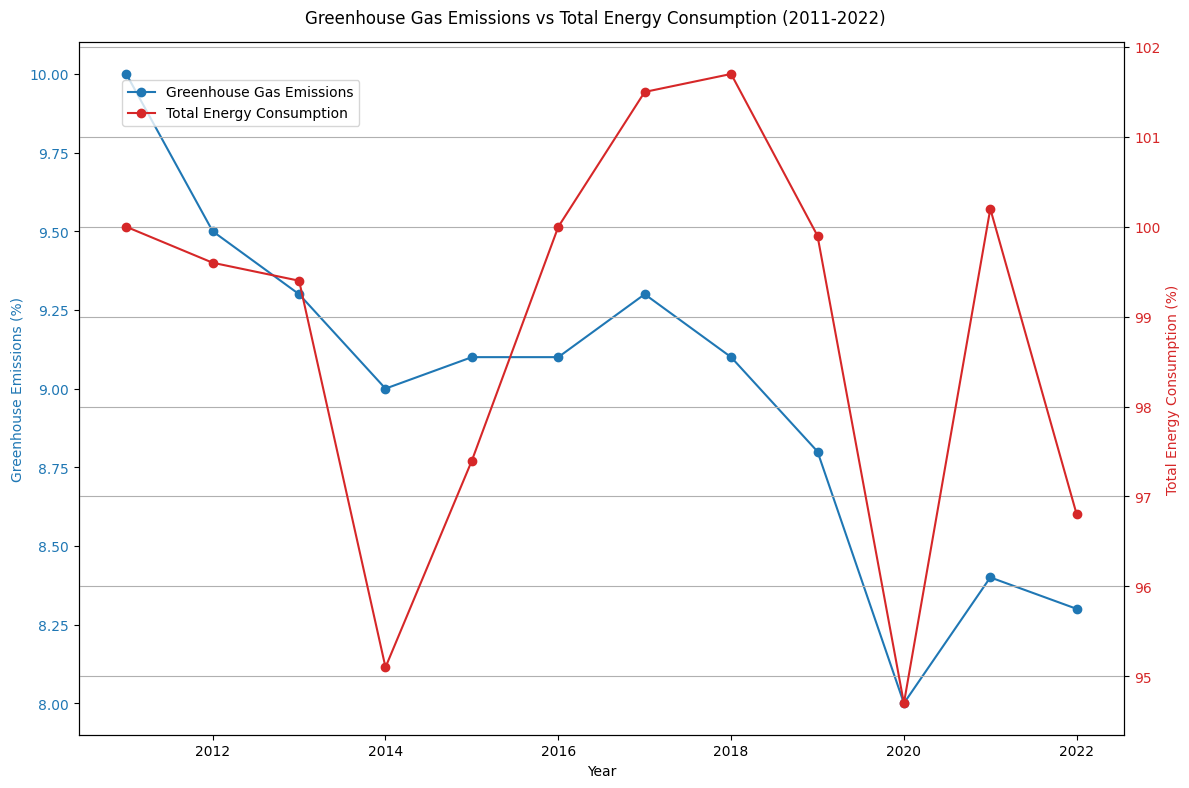

In [41]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
merged_df = {
    'year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Greenhouse_Emissions_%': [10, 9.5, 9.3, 9.0, 9.1, 9.1, 9.3, 9.1, 8.8, 8.0, 8.4, 8.3],
    'Energy_Total_%': [100, 99.6, 99.4, 95.1, 97.4, 100, 101.5, 101.7, 99.9, 94.7, 100.2, 96.8]
}

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Greenhouse Gas Emissions on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Greenhouse Emissions (%)', color=color)
ax1.plot(merged_df['year'], merged_df['Greenhouse_Emissions_%'], marker='o', linestyle='-', color=color, label='Greenhouse Gas Emissions')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis to plot Total Energy Consumption
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Energy Consumption (%)', color=color)
ax2.plot(merged_df['year'], merged_df['Energy_Total_%'], marker='o', linestyle='-', color=color, label='Total Energy Consumption')
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and legends
fig.suptitle('Greenhouse Gas Emissions vs Total Energy Consumption (2011-2022)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Save the figure
plt.grid(True)
plt.tight_layout()
plt.savefig('')  # Save the figure to a file
plt.show()


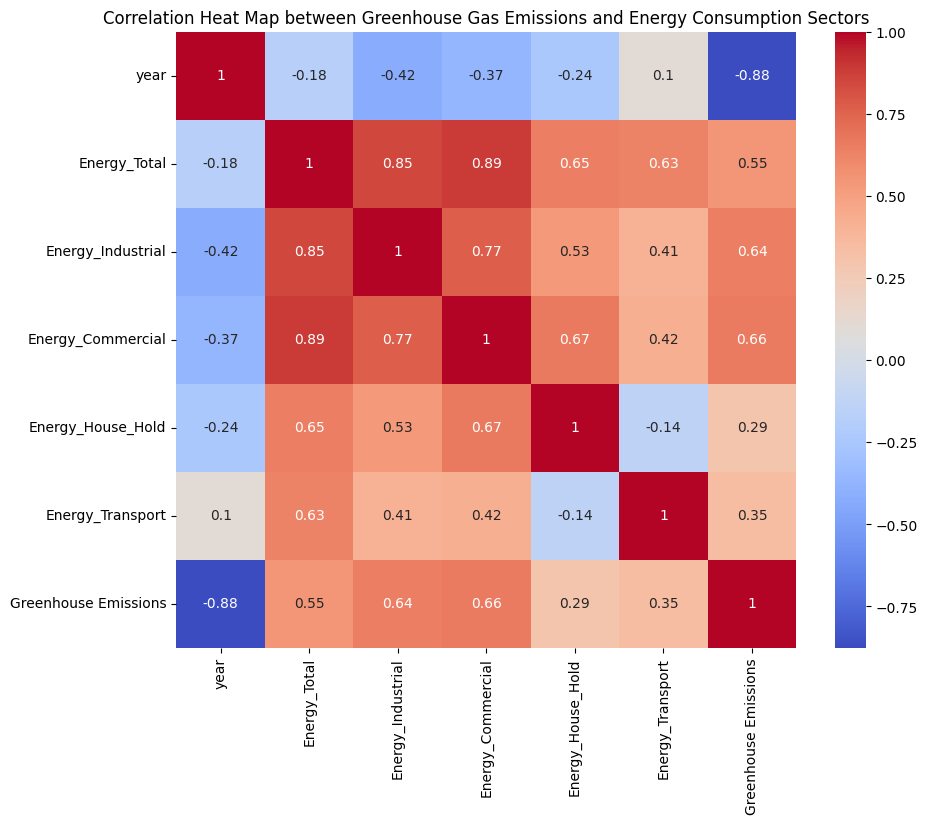

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Energy Consumption by sectors
energy_data = {
    'year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Energy_Total': [934577.602, 933948.049, 932228.051, 890529.118, 909898.236, 928182.513, 941177.648, 942928.329, 937979.399, 885119.323, 939151.686, 902151.506],
    'Energy_Industrial': [244386.095, 239835.981, 236913.967, 233441.635, 233475.933, 237760.295, 239973.737, 241772.617, 238971.384, 230303.266, 241438.524, 226254.751],
    'Energy_Commercial': [128319.937, 131113.382, 132610.323, 123375.593, 128594.113, 130187.179, 133883.152, 131976.670, 128875.741, 121385.640, 130006.218, 121327.959],
    'Energy_House_Hold': [252688.735, 263811.403, 266975.660, 235169.631, 245947.332, 251870.791, 252719.439, 250749.370, 248657.991, 248742.692, 262128.689, 242494.564],
    'Energy_Transport': [278859.112, 269085.076, 265347.632, 268718.554, 272408.498, 278670.070, 284540.635, 285948.525, 288654.895, 251380.184, 271813.986, 279899.781]
}

# Data for Greenhouse Gas Emissions
ghg_data = {
    'year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Greenhouse Emissions': [8.7, 8.5, 8.3, 8.0, 8.1, 8.1, 8.3, 8.1, 7.8, 7.0, 7.4, 7.3]
}

# Convert dictionaries to DataFrames
energy_df = pd.DataFrame(energy_data)
ghg_df = pd.DataFrame(ghg_data)

# Merge the dataframes on 'year'
merged_df = pd.merge(energy_df, ghg_df, on='year')

# Calculate correlation matrix
correlation_matrix = merged_df.corr()

# Plot heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heat Map between Greenhouse Gas Emissions and Energy Consumption Sectors')
plt.show()
